# Projek 1
## Temat:
#### Wykonaj wykresy czasowe w formie interaktywnej z możliwością wyboru co najmniej dwóch serii danych na wykresie. Dla danych wykonaj wizualizację braków danych. Uzasadnij wybrane narzędzia, zinterpretuj rezultaty prac.
#### Alicja Osam-Gyaabin, Mijołaj Zawada, Karol Kociołek

In [57]:
import numpy as np
import pandas as pd
import plotly.express as px
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.io import show
from bokeh.layouts import column, row
from bokeh.models import Select, CustomJS, Slider, PreText, Legend
import matplotlib.pyplot as plt
import random
import missingno as msno

In [59]:
df = pd.read_csv('cleaned_weather.csv')
df['date'] = pd.to_datetime(df['date'])

In [61]:
source = ColumnDataSource(df)

TITLE = 'weather'
output_file(TITLE + ".html")

p = figure(width=1400, height=900, x_axis_type='datetime', title=TITLE)
p.toolbar.logo = "grey"
p.background_fill_color = "#dddddd"
p.xaxis.axis_label = "Datetime"
p.grid.grid_line_color = "white"

line1 = p.line(x='date', y='p', source=source, legend_label='Zmienna 1', color='red')
line2 = p.line(x='date', y='p', source=source, legend_label='Zmienna 2', color='blue')

ys = Select(title='Zmienna 1', value='p', options=df.columns.tolist()[1:])
zs = Select(title='Zmienna 2', value='p', options=df.columns.tolist()[1:])

callback1 = CustomJS(args=dict(source=source, p=p, line=line1, sel1=ys), code="""
    var data = source.data;
    var selected_col = sel1.value;
    
    // Aktualizowanie y w linii wykresu na podstawie wybranej kolumny
    line.glyph.y = {field: selected_col};
    
    source.change.emit();
""")

callback2 = CustomJS(args=dict(source=source, p=p, line=line2, sel1=zs), code="""
    var data = source.data;
    var selected_col = sel1.value;
    
    // Aktualizowanie y w linii wykresu na podstawie wybranej kolumny
    line.glyph.y = {field: selected_col};
    
    source.change.emit();
""")

ys.js_on_change('value', callback1)
zs.js_on_change('value', callback2)

controls = column(ys, zs)
layout = row(controls, p)

p.legend.click_policy = 'hide'

show(layout)

In [63]:
columns_to_modify = df.columns[df.columns != 'date']

selected_columns = random.sample(list(columns_to_modify), 5)

def introduce_missing_values(df, selected_columns, min_weeks=1, max_weeks=4):
    for col in selected_columns:
        num_missing = random.randint(min_weeks, max_weeks) * 7 * 24 * 60 // 10
        
        start_idx = random.randint(0, len(df) - num_missing)
        
        df.loc[start_idx:start_idx + num_missing - 1, col] = np.nan
        
    return df

df2 = introduce_missing_values(df.copy(), selected_columns)
columns_to_modify = df2.columns[df2.columns != 'date']

for column in columns_to_modify:
    nan_indices = np.random.choice(df2.index, size=int(random.randint(1,10) * 0.015 * len(df2)), replace=False)
    df2.loc[nan_indices, column] = np.nan

In [65]:
(df2.isna().sum()/len(df2))*100

date         0.000000
p            6.723470
T           16.786853
Tpot         4.499393
Tdew         8.998785
rh          14.999241
VPmax        7.499620
VPact        8.998785
VPdef        7.499620
sh          10.499848
H2OC        11.999013
rho         11.820632
wv           5.998558
max. wv      5.998558
wd           1.499165
rain         8.998785
raining     10.499848
SWDR         4.499393
PAR         15.149157
max. PAR     7.499620
Tlog         7.795658
dtype: float64

<Axes: >

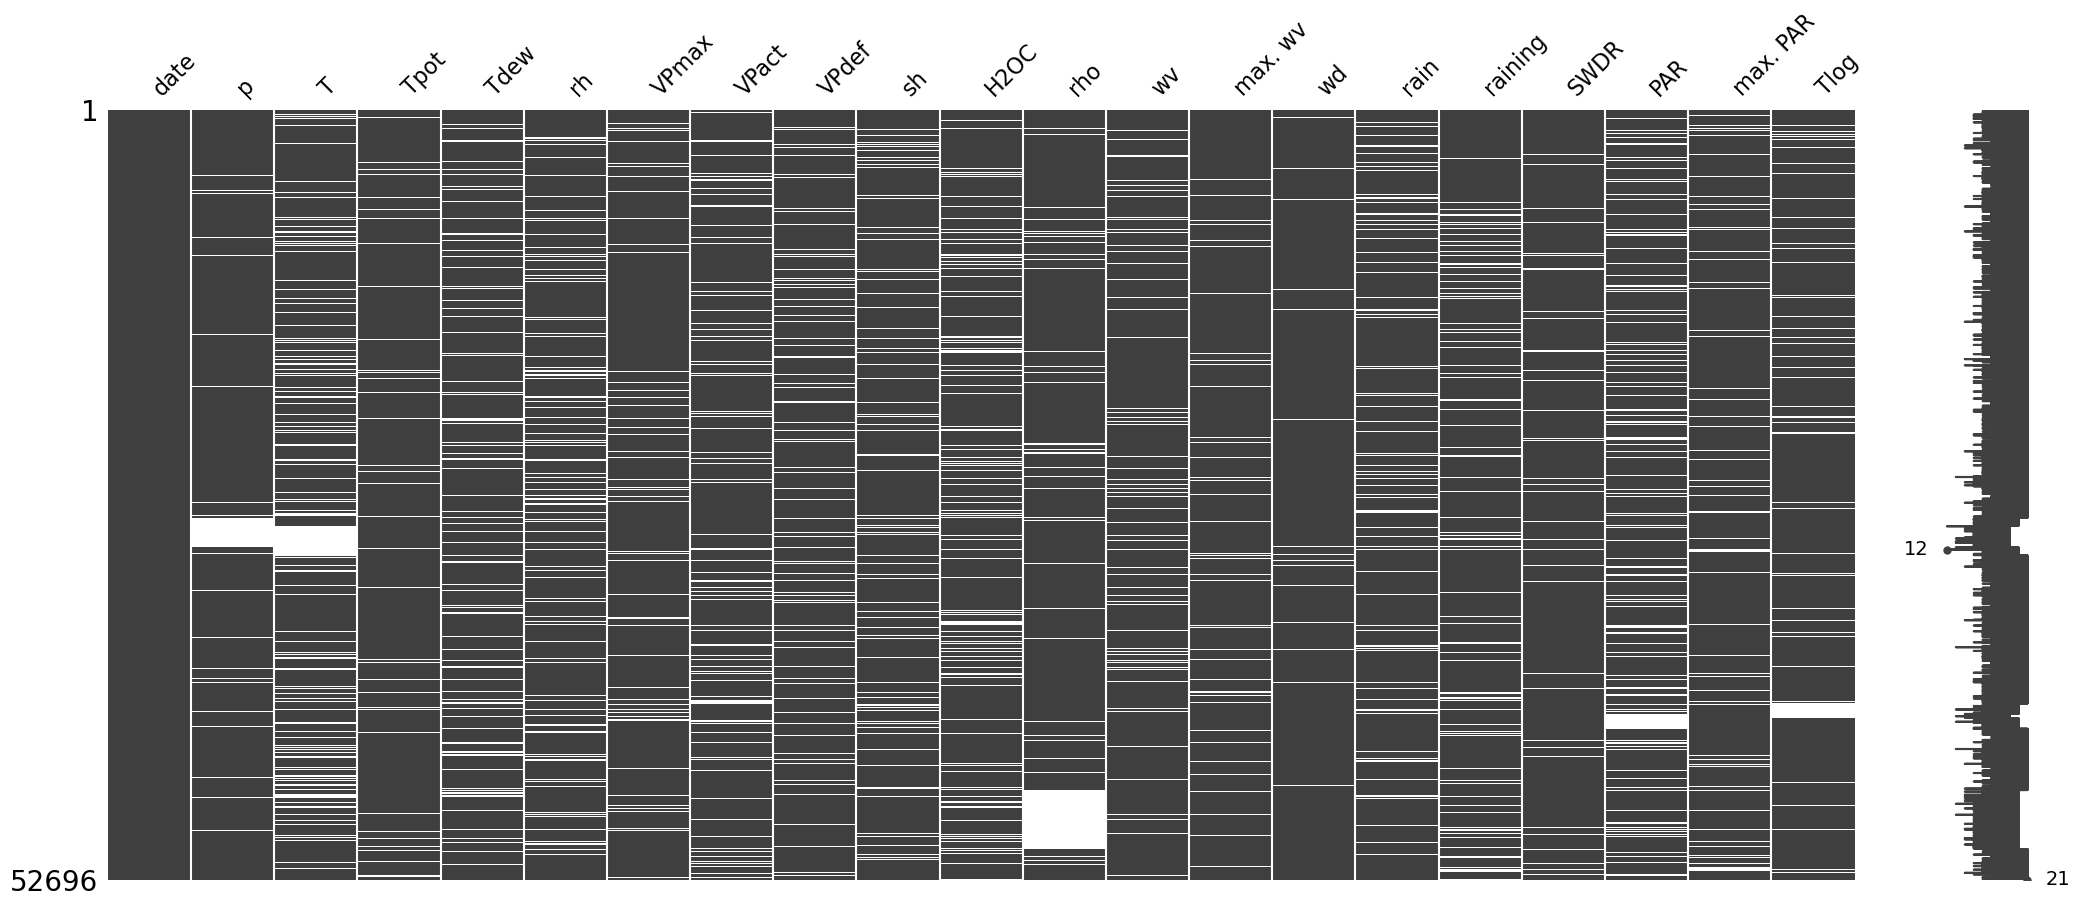

In [67]:
msno.matrix(df2)

<Axes: >

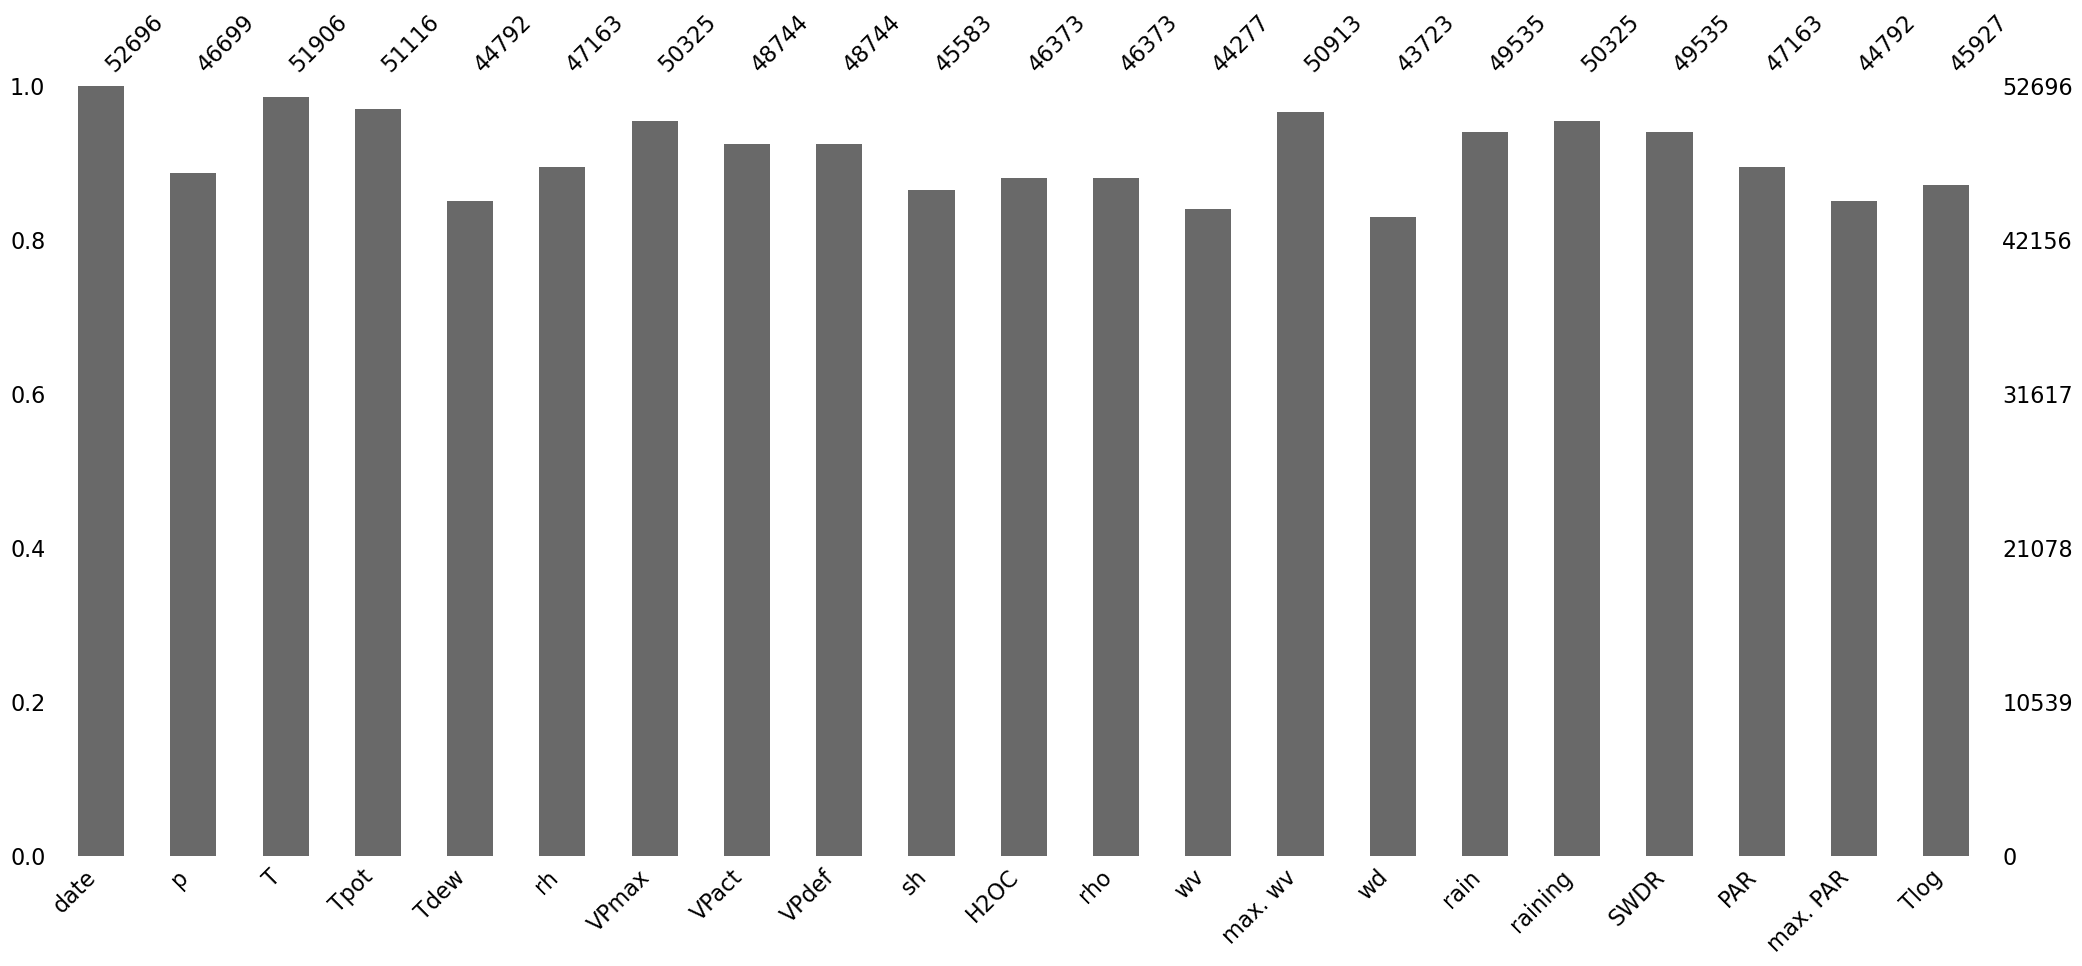

In [19]:
msno.bar(df2)

In [69]:
df3 = df2.style.highlight_null(props="background-color: yellow;")

with pd.ExcelWriter('nuls.xlsx', engine='openpyxl') as writer:
    df3.to_excel(writer, index=False, sheet_name='Sheet1')

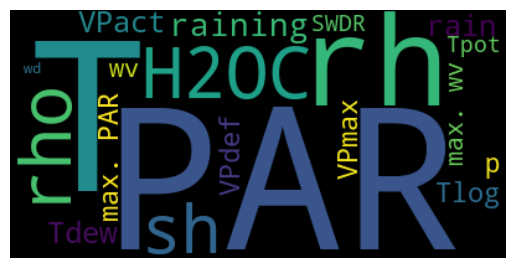

In [70]:
from wordcloud import WordCloud
f_dict = ( df2.isna().sum()/len(df2)).to_dict() 
wc = WordCloud()
wc.generate_from_frequencies(f_dict)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [137]:
import math

TITLE = 'Gantt Bokeh6'
output_file(TITLE+".html")

tools = "hover,pan,wheel_zoom,box_zoom,reset,save,xpan,ypan"

p = figure(width=600, height=400, toolbar_location="above", tools=tools, title=TITLE, x_axis_type='datetime')
p.background_fill_color = "#fafafa"

df3 = pd.DataFrame(np.where(pd.isna(df2), 1, np.nan), columns=df2.columns)

df3['date'] = df2['date']

p.scatter(x=df2['date'], y=df3['p'], color='green', size=50, legend_label='1: p')
p.scatter(x=df2['date'], y=df3['T'], color='blue', size=45, legend_label='2: T')
p.scatter(x=df2['date'], y=df3['Tpot'], color='orange', size=40, legend_label='3: Tpot')
p.scatter(x=df2['date'], y=df3['Tdew'], color='pink', size=35, legend_label='4: Tdew')
p.scatter(x=df2['date'], y=df3['rh'], color='yellow', size=30, legend_label='5: rh')
p.scatter(x=df2['date'], y=df3['VPmax'], color='black', size=25, legend_label='6: VPmas')
p.scatter(x=df2['date'], y=df3['VPact'], color='red', size=20, legend_label='7: VPact')
p.scatter(x=df2['date'], y=df3['VPdef'], color='purple', size=15, legend_label='8:VPdef')
p.scatter(x=df2['date'], y=df3['sh'], color='beige', size=10, legend_label='9: sh')
p.scatter(x=df2['date'], y=df3['H2OC'], color='brown', size=5, legend_label='10: H2OC')

p.yaxis.axis_label = "data"
p.yaxis.axis_label_text_color = "red"
p.xaxis.axis_label = "datetime"
p.xaxis.axis_label_text_color = "red"

leg = p.legend[0]
p.add_layout(leg,'right')

show(p)

,date,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,...,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
0,2020-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 00:30:00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01 00:40:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4,2020-01-01 00:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52691,2020-12-31 23:20:00,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52692,2020-12-31 23:30:00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52693,2020-12-31 23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
52694,2020-12-31 23:50:00,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [121]:
df2

,date,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,...,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1280.62,1.02,1.60,224.3,NaN,0.0,0.0,0.0,0.0,11.45
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,1280.33,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51
2,2020-01-01 00:30:00,1008.66,0.73,273.21,NaN,85.1,6.44,5.48,0.96,NaN,...,1280.29,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60
3,2020-01-01 00:40:00,NaN,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1281.97,1.11,1.48,206.4,0.0,0.0,NaN,NaN,0.0,11.70
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,1282.08,0.49,1.40,209.6,0.0,NaN,0.0,0.0,0.0,11.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52691,2020-12-31 23:20:00,978.32,NaN,277.16,-0.80,80.0,7.20,5.76,1.44,3.67,...,1234.61,0.73,1.40,180.6,0.0,0.0,0.0,0.0,0.0,13.40
52692,2020-12-31 23:30:00,978.30,2.13,277.01,NaN,83.1,7.12,5.92,1.20,3.77,...,1235.20,0.43,NaN,174.0,0.0,0.0,0.0,0.0,0.0,13.42
52693,2020-12-31 23:40:00,978.26,1.99,276.88,-0.71,82.2,7.05,5.80,1.26,3.69,...,1235.82,0.38,0.76,248.9,0.0,0.0,0.0,0.0,NaN,13.45
52694,2020-12-31 23:50:00,978.26,2.07,276.95,NaN,NaN,7.09,5.77,1.32,3.68,...,1235.49,0.57,1.07,196.6,0.0,0.0,0.0,0.0,NaN,13.47
